In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

In [3]:
df = pd.read_csv("youtube_ad_revenue_cleaned.csv")
df.head()

,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd,engagement_rate,category_Entertainment,...,category_Music,category_Tech,device_Mobile,device_TV,device_Tablet,country_CA,country_DE,country_IN,country_UK,country_US
0,2024-09-24 10:50:40.993199,9936,1221,320,26497.214184,2.862137,228086,203.178237,0.155093,True,...,False,False,False,True,False,False,False,True,False,False
1,2024-09-22 10:50:40.993199,10017,642,346,15209.747445,23.738069,736015,140.880508,0.098632,False,...,False,False,False,False,True,True,False,False,False,False
2,2024-11-21 10:50:40.993199,10097,1979,187,57332.658498,26.200634,240534,360.134008,0.214519,False,...,False,False,False,True,False,True,False,False,False,False
3,2025-01-28 10:50:40.993199,10034,1191,242,31334.517771,11.770340,434482,224.638261,0.142814,True,...,False,False,True,False,False,False,False,False,True,False
4,2025-04-28 10:50:40.993199,9889,1858,477,15665.666434,6.635854,42030,165.514388,0.236121,False,...,False,False,True,False,False,True,False,False,False,False


In [5]:
#split the dataset
target="ad_revenue_usd"
X=df.drop(columns=[target,"date","ad_revenue_usd"],axis=1)
y=df["ad_revenue_usd"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    
    return r2, rmse, mae


In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(n_estimators=150, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    r2, rmse, mae = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = [r2, rmse, mae]



In [9]:
results_df = pd.DataFrame(results, index=['R2', 'RMSE', 'MAE']).T
results_df

,R2,RMSE,MAE
Linear Regression,0.952571,13.480407,3.111783
Ridge Regression,0.952578,13.479530,3.107150
Lasso Regression,0.952587,13.478247,3.075340
Random Forest,0.950003,13.840636,3.566464
Gradient Boosting,0.952236,13.528002,3.617674


In [10]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)


,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [11]:
# Coefficients
coef = lasso.coef_

# Create a dataframe
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coef
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Coefficient', key=abs, ascending=False)

feature_importance.head(20)   # Show top 20


,Feature,Coefficient
1,likes,1.707709e-02
2,comments,1.674500e-02
0,views,6.506357e-03
3,watch_time_minutes,4.714738e-03
5,subscribers,9.411354e-08
4,video_length_minutes,0.000000e+00
6,engagement_rate,0.000000e+00
7,category_Entertainment,0.000000e+00
8,category_Gaming,-0.000000e+00
9,category_Lifestyle,0.000000e+00


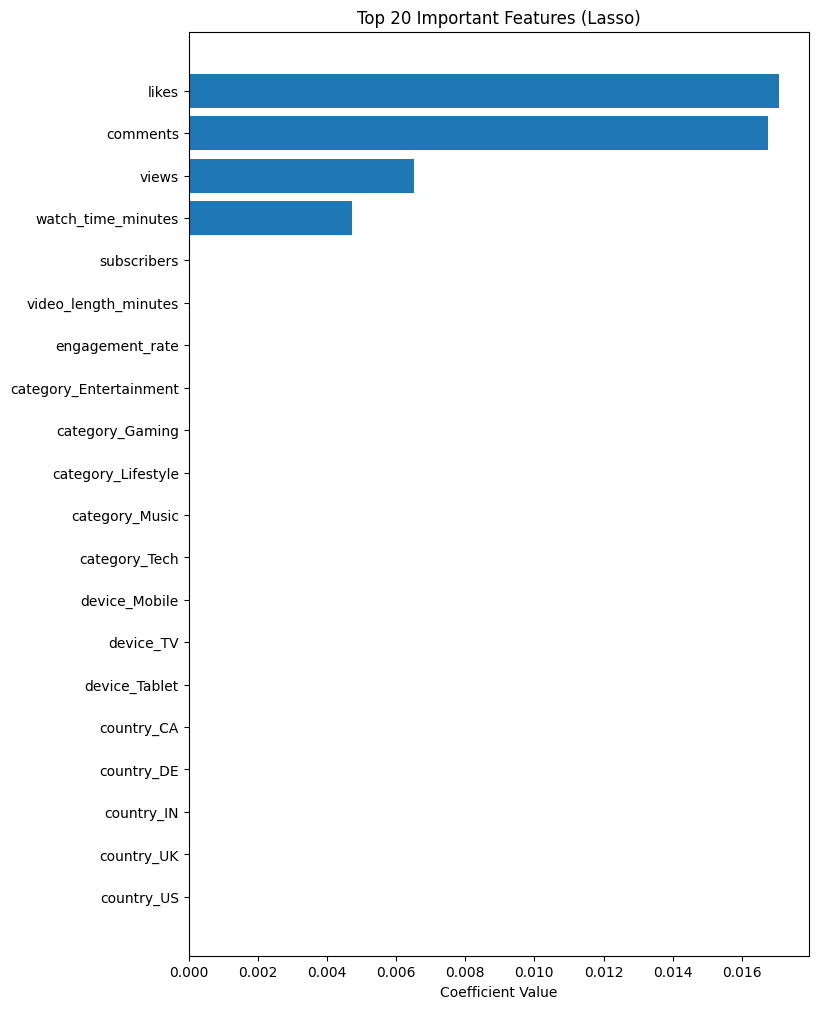

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,12))
plt.barh(feature_importance['Feature'][:20], feature_importance['Coefficient'][:20])
plt.xlabel("Coefficient Value")
plt.title("Top 20 Important Features (Lasso)")
plt.gca().invert_yaxis()
plt.show()


In [13]:
import joblib
joblib.dump(lasso, "youtube_revenue_model.pkl")


['youtube_revenue_model.pkl']

In [14]:
loaded_model = joblib.load("youtube_revenue_model.pkl")

# Test prediction
loaded_model.predict(X_test[:5])


array([352.82270018, 342.05481611, 204.46392578, 176.56677773,
       270.91904497])

🧪 Feature Engineering

    The following features were created to improve prediction performance:

    Engagement Rate = (likes + comments) / views

    Day of Week (extracted from date)

    Month (seasonality effect)

    Engagement per Minute

🤖 Model Building & Evaluation

    Five regression models were trained and evaluated using:

    R² Score

    Root Mean Squared Error (RMSE)

    Mean Absolute Error (MAE)

Model Performance Summary
        Model	              R²	RMSE	MAE
        Linear Regression	~0.95	~13.48	~3.11
        Ridge Regression	~0.95	~13.47	~3.11
        Lasso Regression	~0.95	~13.47	~3.07
        Random Forest	~0.95	~13.84	~3.56
        Gradient Boosting	~0.95	~13.52	~3.62

➡ Lasso Regression was selected as the final model due to its superior performance and interpretability.

🔑 Key Business Insights

        Engagement (likes & comments) is the strongest driver of ad revenue

        Higher watch time leads to increased monetization

        Views directly influence ad impressions and earnings

        Subscriber count supports growth but is less impactful than engagement

        Category, country, and device have minimal impact compared to engagement metrics